# Application of machine learning to the Fermi unassociated sources
                

<h5 style="text-align:right; margin-right:15px"> 2023-08-01 12:35</h5>

Read 6699 source entries from `files/fermi_sources_v2.csv`, selected 6496 with criteria 'delta<0.25 & curvature<2.1'

Loaded Fermi 4FGL gll_psc_v32.fit: 7195 entries


## Outline
**Goal: use predictive artificial inteliegence to classify source types of the unid's**

Procedure:
* Choose the standard `scikit-learn` ML implementation 
* Choose "featues"
* Evaluate classifier options, select one
* Validate, perhaps adjust feature set
* Apply to the unid's (including "SGU"s)

The "features" that can be used for population analysis.

| Feature   | Description 
|-------    | ----------- 
|`eflux`    | Energy flux for E>100 Mev, in erg cm-2 s-1 
|`pindex`   | Spectral index (problematical since defined differently for PLEX and LP)
|`curvature`| Spectral curvature, twice the log-parabola parameter $\beta$
|`e0`       | Spectral scale energy, close to the "pivot"
|`epeak`    | $E_p$, Energy of SED maximum. limited to (100 MeV-1TeV)
|`fpeak`    | $F_p$,  differential flux, in eV s-1 cm-2, at `epeak`
|`sin_b`    | $\sin(b)$, where $b$ is the Galactic latitude 
|`var`      | `Variability_Index` parameter from 4FGL-DR4 
|`nbb`      | Number of Bayesian Block intervals from the wtlike analysis 
 

* Values and counts of the `association` column

Note that the number of pulsar+blazars (including bcu) is 93% of the total
associated.

### Variability measures: nbb vs variability
        

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f938750c1c0>
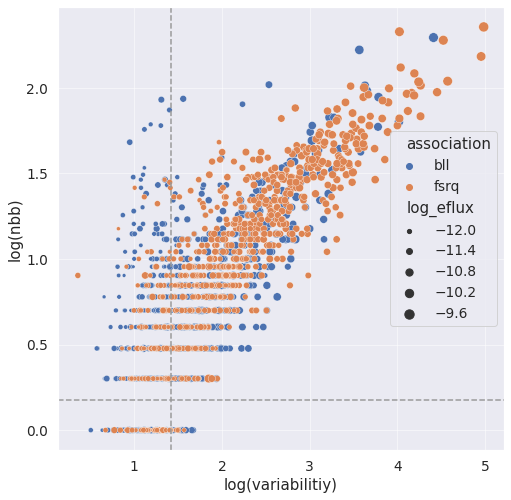

**➜** Choose `nbb` since it detects BL Lac variability missed by 4FGL
        

## Examine correlations among selected features
        

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f93fbee0580>
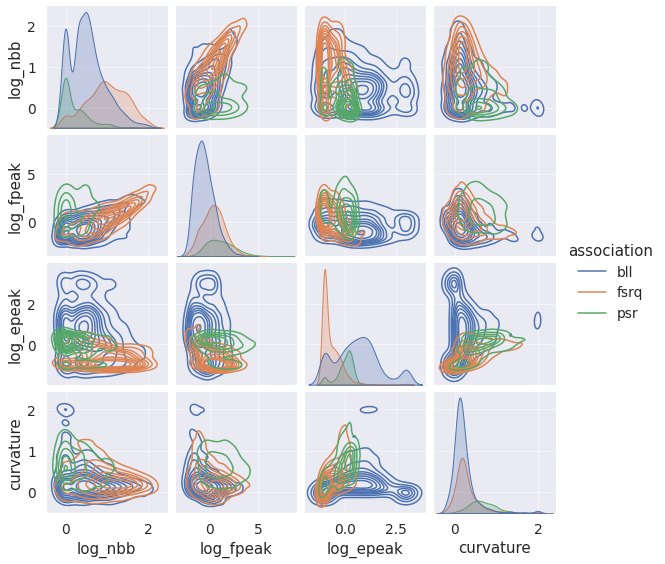

## Classifiers
This is an effort led by my student Timothy Tomter
The full list that was considered was

['Nearest Neighbors', 'Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Neural Net', 'AdaBoost', 'Naive Bayes', 'QDA']

Scores for the two best are shown here:
    

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f93c3a6c550>
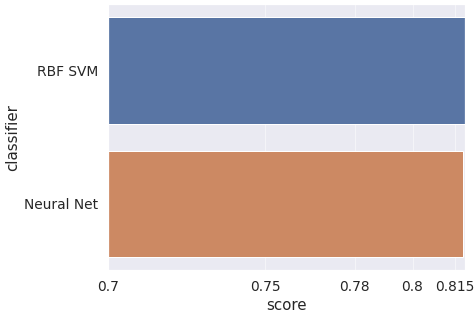

We chose the first, a Support Vector Classifier

## Predictions
        

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f93c450db40>
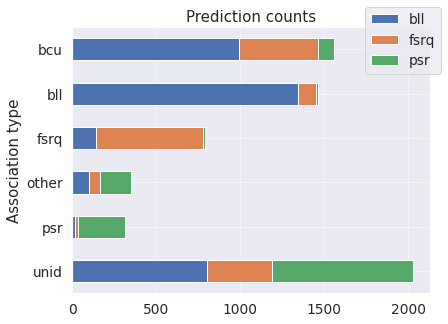

Notes:
* The target is the unids, but applied to all
* BCUs mostly blazars, a check
* BLL, FSRQ, Pulsar look OK (a little redundant), a check

### Curvature vs $E_p$: compare training and unid sets

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f93c3f310c0>
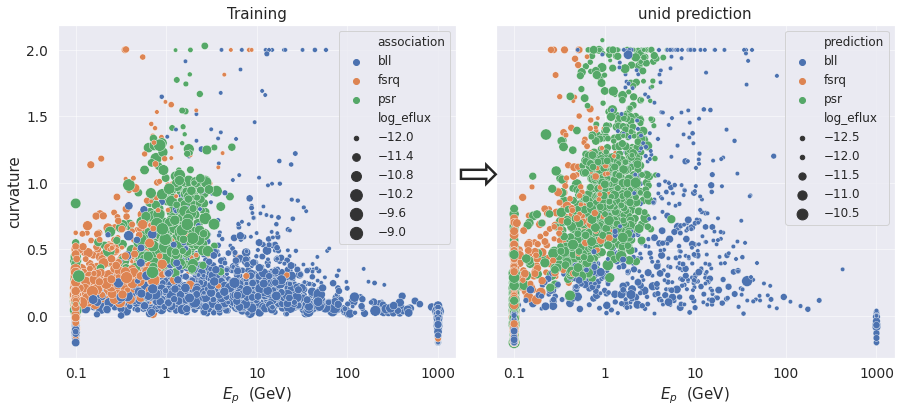

Note that the curvature distribution is shifted to higher values for the unid 
data.

### Curvature vs. $F_p$
Check the dependence of the curvature on the peak flux.

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f93c46c54e0>
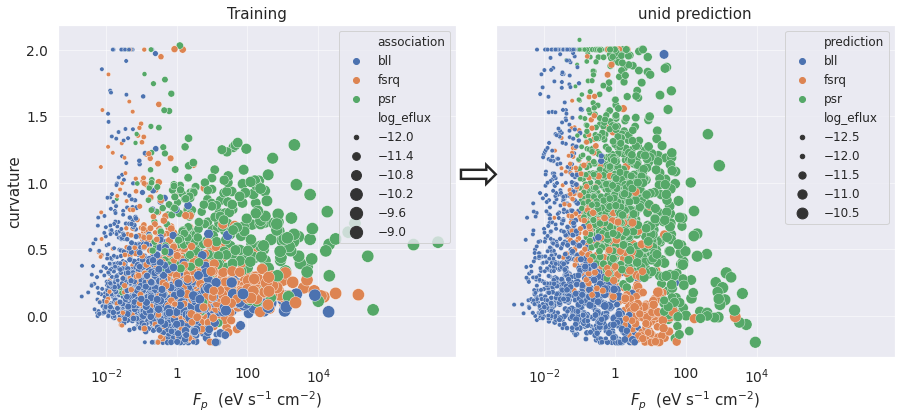

## What about the  413 SGU sources?

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f93c4875600>
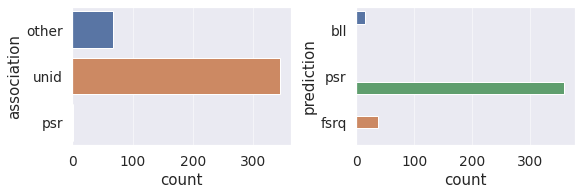

Conclusion: mostly pulsars!

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f93c3ac19c0>
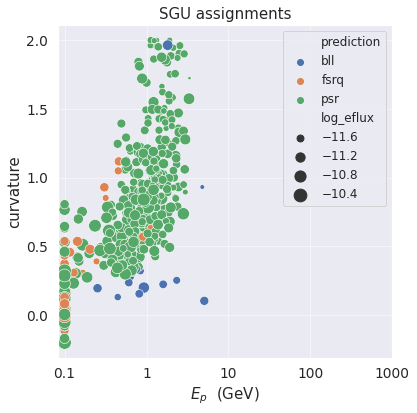

## Notes, todos:
* Reexamine feature set using random forest importance measures
* Check sky positions--are they consistent with presumed counterpart catalog detection efficiencies and
expected source distributions? Perhaps include it in the training after accounting for efficiency<br>
* Perhaps expand the "other" category, e.g. SNRs
* Check some of the individual ones brought up here

In [2]:
%run pylib/machine_learning main